## Réseau neuronal

In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import re
from IPython.display import display
import tensorflow as tf


### Lire les données

In [2]:
df=pd.read_csv('data.csv')

### Exploration des données

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
print(df.shape)
print(df.columns)

(568454, 10)
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


## Sélection des données

In [5]:
# Delete the columns that are not required

df.drop(['Id', 'ProductId','UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time',], axis=1, inplace=True)

In [6]:
print(df.columns)

Index(['Score', 'Summary', 'Text'], dtype='object')


### Suite de l'exploration des données

#### Notes attribués

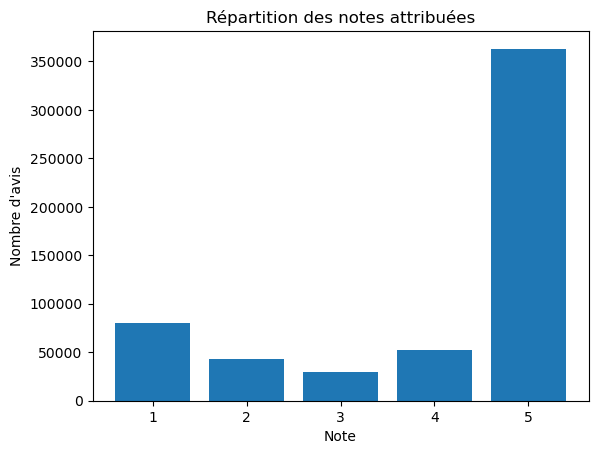

In [7]:
plt.bar(df['Score'].unique(), df['Score'].value_counts())
plt.xlabel('Note')
plt.ylabel('Nombre d\'avis')
plt.title('Répartition des notes attribuées')
plt.show()

#### Répartition des notes

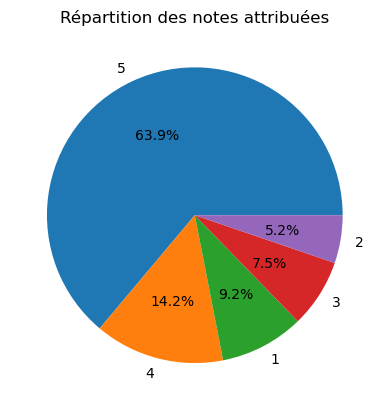

In [8]:
sentiments_counts = df['Score'].value_counts()
plt.pie(sentiments_counts, labels=sentiments_counts.index, autopct='%1.1f%%')
plt.title('Répartition des notes attribuées')
plt.show()

#### Longueur des commentaire

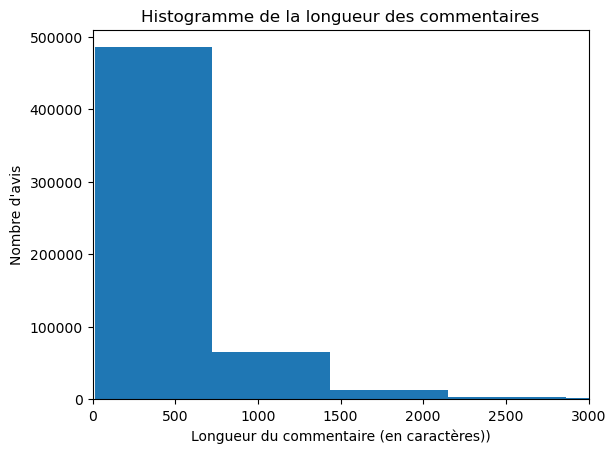

In [9]:
df['Comment_Length'] = df['Text'].apply(lambda x: len(x))
plt.hist(df['Comment_Length'], bins=30)
plt.xlabel('Longueur du commentaire (en caractères))')
plt.ylabel('Nombre d\'avis')
plt.title('Histogramme de la longueur des commentaires')
plt.xlim(0, 3000) 

plt.show()


#### Longueur moyenne des commentaires en fonction de leur notation

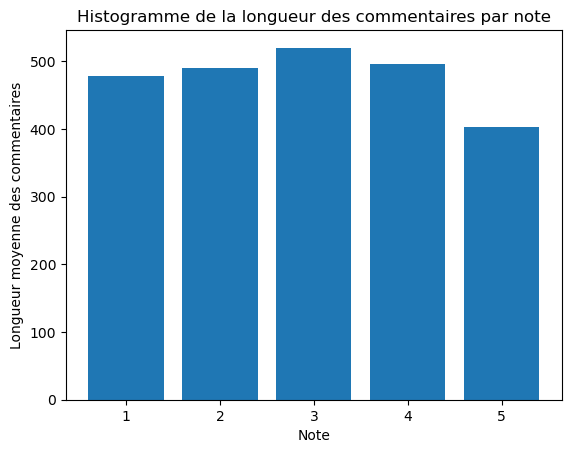

In [10]:


# Regroupement des commentaires par note et calcul de leur longueur moyenne
grouped_data = df.groupby('Score')['Text'].apply(lambda x: x.str.len().mean()).reset_index()

# Tracé de l'histogramme avec la longueur des commentaires moyenne par note
plt.bar(grouped_data['Score'], grouped_data['Text'])
plt.xlabel('Note')
plt.ylabel('Longueur moyenne des commentaires')
plt.title('Histogramme de la longueur des commentaires par note')
plt.show()


### Visualisation des mots 

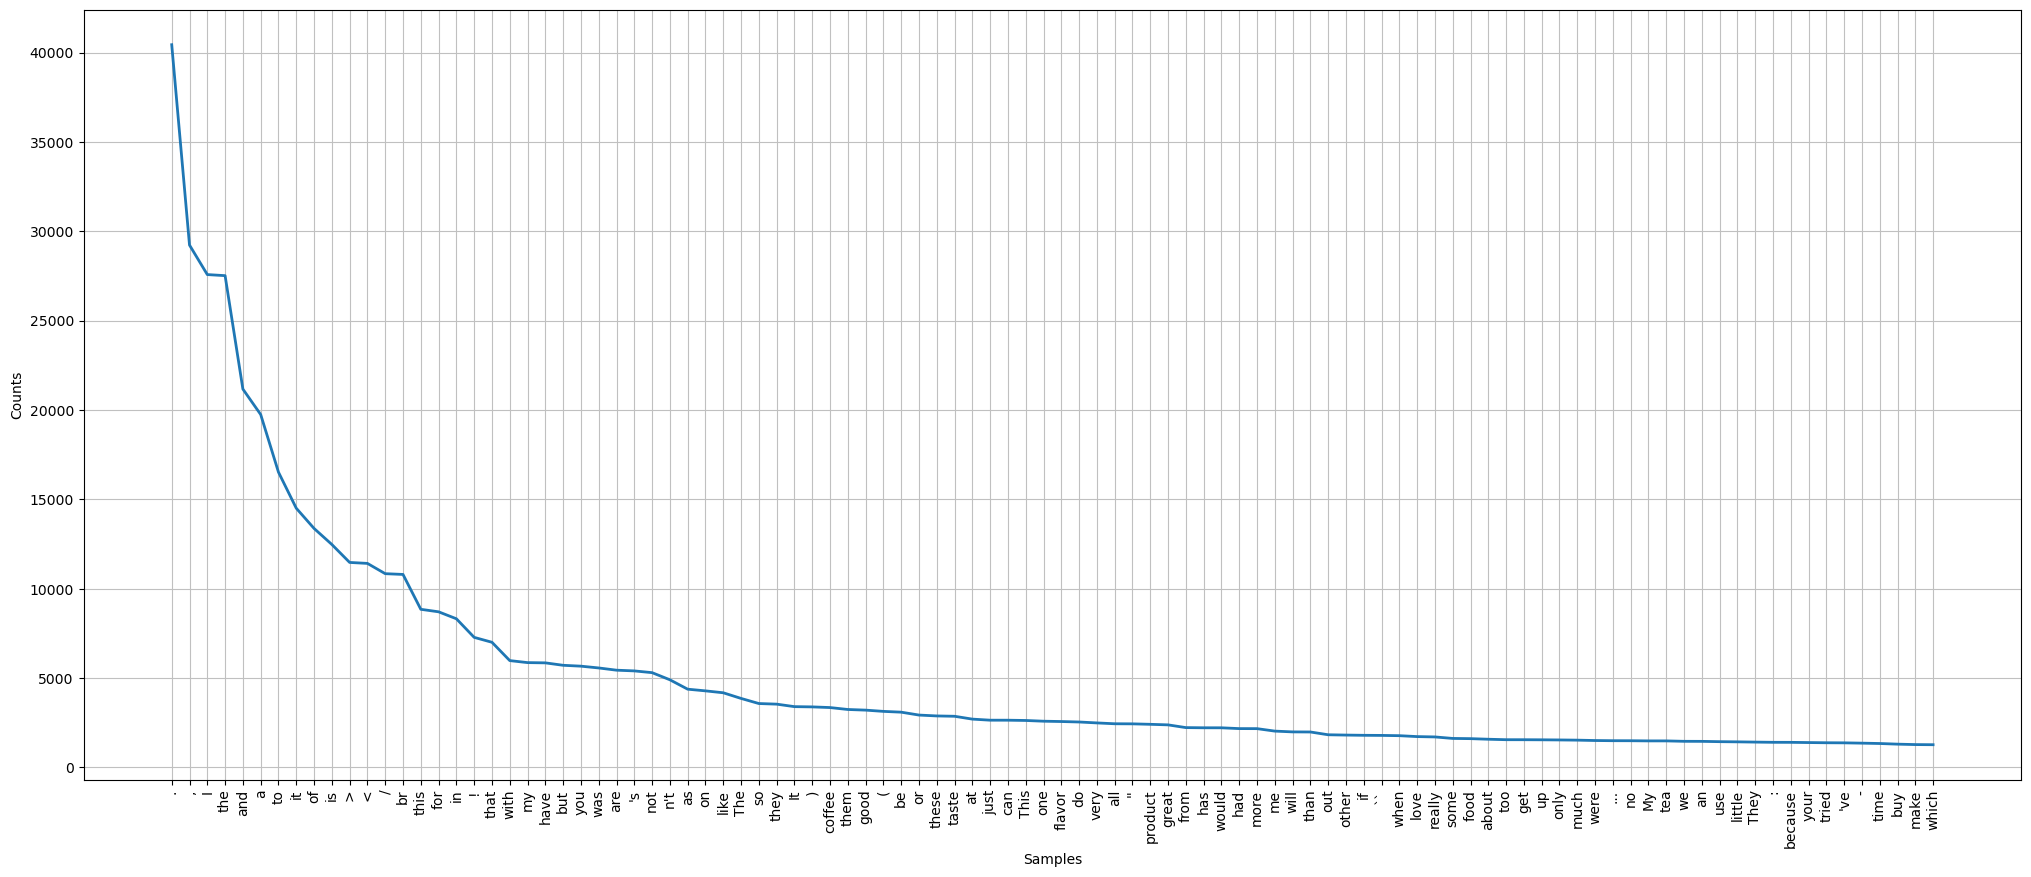

<Axes: xlabel='Samples', ylabel='Counts'>

In [11]:
# Plot frequency distribution of words

words = nltk.tokenize.word_tokenize(df['Text'][:10000].str.cat(sep=' '))
fdist = FreqDist(words)
plt.figure(figsize=(25,10))
fdist.plot(100,cumulative=False)

## Prétraitement des données

### Suppression de la ponctuation

In [12]:
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['Text'].head(100)

0     I have bought several of the Vitality canned d...
1     Product arrived labeled as Jumbo Salted Peanut...
2     This is a confection that has been around a fe...
3     If you are looking for the secret ingredient i...
4     Great taffy at a great price  There was a wide...
                            ...                        
95    Ive been very pleased with the Natural Balance...
96    My 112 year old basenjijack russell mix loves ...
97    Our pup has experienced allergies in forms of ...
98    My English Bulldog had skin allergies the summ...
99    I fed this to my Golden Retriever and he hated...
Name: Text, Length: 100, dtype: object

### Suppression des mots vides

In [13]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)  
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]  
    return ' '.join(filtered_tokens)  

df['Text'] = df['Text'[:10000]].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /Users/jules/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df['Text'].head(10000)

0       bought several Vitality canned dog food produc...
1       Product arrived labeled Jumbo Salted Peanutsth...
2       confection around centuries light pillowy citr...
3       looking secret ingredient Robitussin believe f...
4       Great taffy great price wide assortment yummy ...
                              ...                        
9995    switched advance similac organic product think...
9996    Like bad reviews say organic formula constipat...
9997    wanted solely breastfeed unable keep supplemen...
9998    love fact get delieved house delievy chargeit ...
9999    7 week old gas constipation problems first 5 w...
Name: Text, Length: 10000, dtype: object

### Exploration des commentaires

In [15]:
comments_one_star = df[df['Score'] == 1]['Text']
print(comments_one_star.head(10))

1      Product arrived labeled Jumbo Salted Peanutsth...
12     cats happily eating Felidae Platinum two years...
26           candy red flavor plan chewy would never buy
50     oatmeal good mushy soft dont like Quaker Oats ...
62                 Arrived 6 days stale could eat 6 bags
73     Buyer Beware Please sweetener everybody Maltit...
75     tea flavor whole brunch artifial flavors retur...
99     fed Golden Retriever hated wouldnt eat gave te...
153    singles sell 250 336 store 1 box 24 singles Im...
164    Seriously product tasteless come much better t...
Name: Text, dtype: object


### Convertion des commentaires en minuscule pour éviter la casse

In [16]:
df['Text'] = df['Text'].str.lower()
df['Text'].head(10000)

0       bought several vitality canned dog food produc...
1       product arrived labeled jumbo salted peanutsth...
2       confection around centuries light pillowy citr...
3       looking secret ingredient robitussin believe f...
4       great taffy great price wide assortment yummy ...
                              ...                        
9995    switched advance similac organic product think...
9996    like bad reviews say organic formula constipat...
9997    wanted solely breastfeed unable keep supplemen...
9998    love fact get delieved house delievy chargeit ...
9999    7 week old gas constipation problems first 5 w...
Name: Text, Length: 10000, dtype: object

## Tokenisation

### Diviser le texte en mots individuels ou en tokens

In [17]:
df['Tokens'] = df['Text'[:10000]].apply(nltk.word_tokenize)

## Vectorisation

In [29]:
# Chemin vers le fichier word2vec pré-entraîné
word2vec_path = '../solution_factory/linguistic-regularities-in-continuous-space-word-representations.bib'

# Charger le modèle Word2Vec
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

# Vectoriser les commentaires en utilisant Word2Vec
X = []
for tokens in df['Tokens']:
    vec = np.mean([word2vec_model[word] for word in tokens if word in word2vec_model], axis=0)
    X.append(vec)

X = np.array(X)


ValueError: invalid literal for int() with base 10: '@inproceedings{mikolov2013linguistic,'